In [26]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import os

# After the imports we can start processing the files with the functions

In [ ]:
def load_data(file_path): #Loads data and makes it into numpy struct
    return np.loadtxt(file_path)

def compute_spike_counts(spike_times, bin_size, duration): #Computes spike
    bins = np.arange(0, duration, bin_size)
    spike_counts, _ = np.histogram(spike_times, bins=bins)
    return spike_counts

def compute_isi(spike_times): #Computes inter-spike interval
    return np.diff(spike_times)

def compute_fano_factor(spike_counts): #Computes Fano Factor
    return np.var(spike_counts) / np.mean(spike_counts)

def fit_exponential(isis): #Fits exponential distribution to data
    lambda_mle = 1 / np.mean(isis)
    return lambda_mle

In [ ]:
def plot_dist(data, dist_type, mle_param, bins=30): #Plots data and fitted distribution
    plt.hist(data, bins=bins, density=True, alpha=0.6, color='g', label='Data')
    
    x = np.linspace(min(data), max(data), 100) #For plotting fitted distribution
    if dist_type == "poisson":
        pmf_values = stats.poisson.pmf(np.arange(int(min(data)), int(max(data))), mle_param)
        plt.plot(np.arange(int(min(data)), int(max(data))), pmf_values, 'ro-', label=f'Poisson Fit (λ={mle_param:.2f})')
    elif dist_type == "exponential":
        pdf_values = stats.expon.pdf(x, scale=1/mle_param)
        plt.plot(x, pdf_values, 'r-', label=f'Exponential Fit (λ={mle_param:.2f})')
    
    plt.legend() #Show legend
    plt.xlabel("Value") #Set x-axis label
    plt.ylabel("Density") #Set y-axis label
    plt.title(f"{dist_type} distribution") #Set title
    plt.show() #Show plot

File: /Users/tinduong/Projects/neural_class/project2/BuszakiLab MizusekiK hc3/ec012/ec012ec.187.res.1
MLE Poisson λ: 0.01, Fano Factor: 0.99
MLE Exponential λ: 0.08, Sample Mean ISI: 12.30


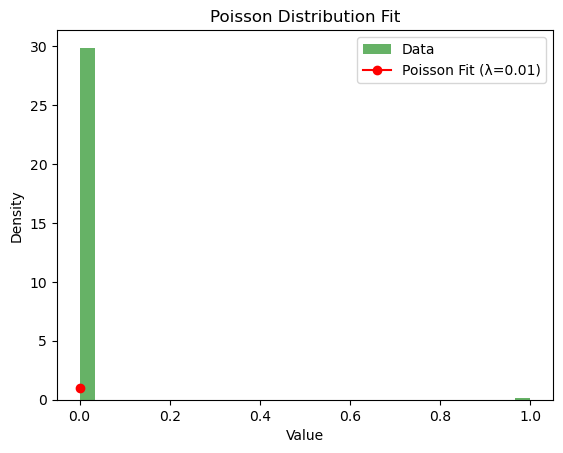

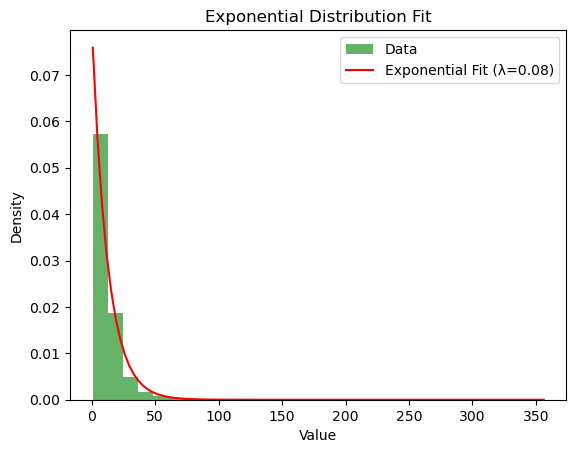

File: /Users/tinduong/Projects/neural_class/project2/BuszakiLab MizusekiK hc3/ec012/ec012ec.187.res.2
MLE Poisson λ: 0.01, Fano Factor: 0.99
MLE Exponential λ: 0.12, Sample Mean ISI: 8.10


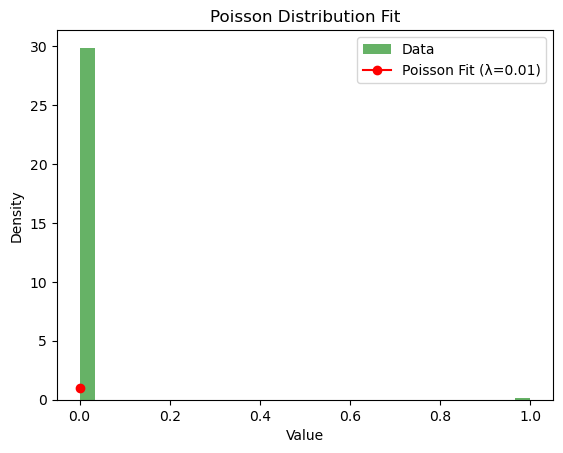

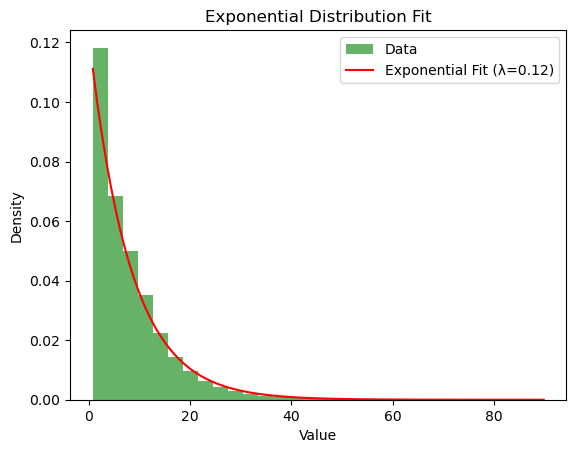

File: /Users/tinduong/Projects/neural_class/project2/BuszakiLab MizusekiK hc3/ec012/ec012ec.228.res.1
MLE Poisson λ: 0.01, Fano Factor: 0.99
MLE Exponential λ: 0.13, Sample Mean ISI: 7.69


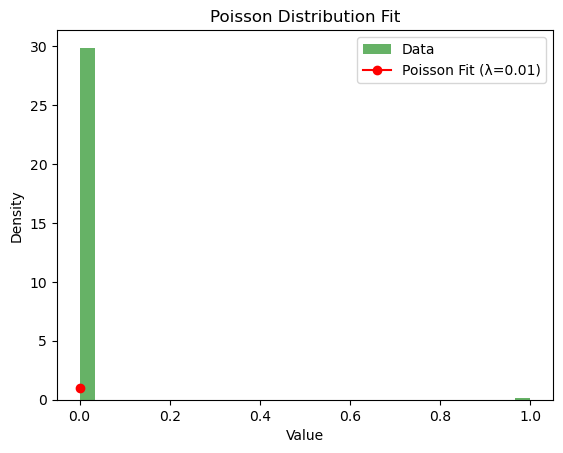

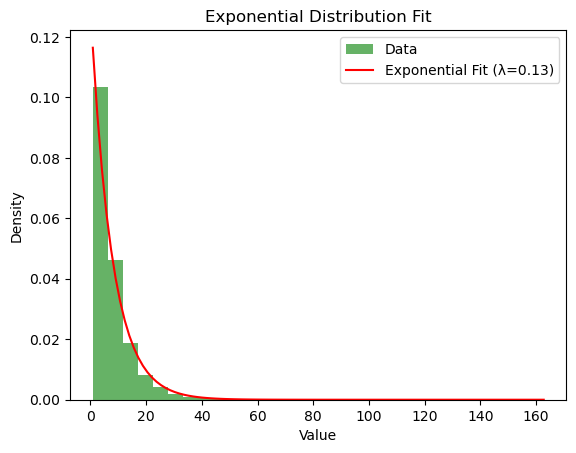

File: /Users/tinduong/Projects/neural_class/project2/BuszakiLab MizusekiK hc3/ec012/ec012ec.228.res.2
MLE Poisson λ: 0.00, Fano Factor: nan
MLE Exponential λ: 0.08, Sample Mean ISI: 12.94


/var/folders/jj/vdvh5h8n303gtfkqp70hlw9c0000gn/T/ipykernel_14315/2335594170.py:2: RuntimeWarning: invalid value encountered in scalar divide
  return np.var(spike_counts) / np.mean(spike_counts)


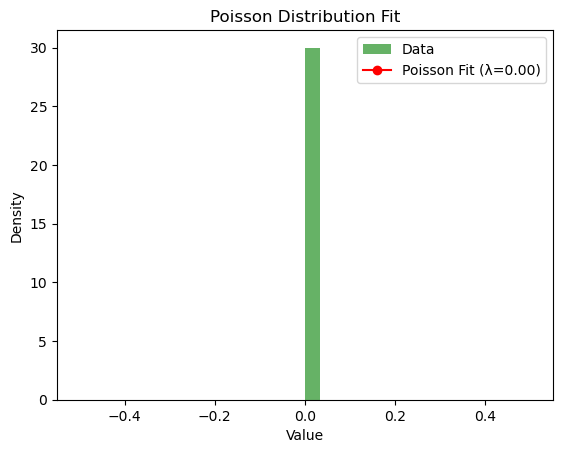

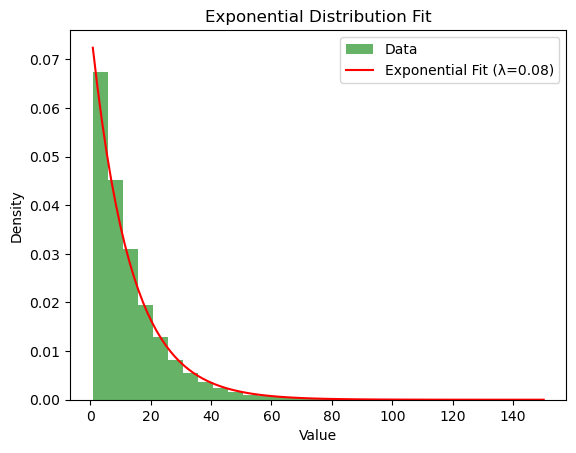

File: /Users/tinduong/Projects/neural_class/project2/BuszakiLab MizusekiK hc3/ec012/ec012ec.375.res.1
MLE Poisson λ: 0.01, Fano Factor: 0.99
MLE Exponential λ: 0.12, Sample Mean ISI: 8.11


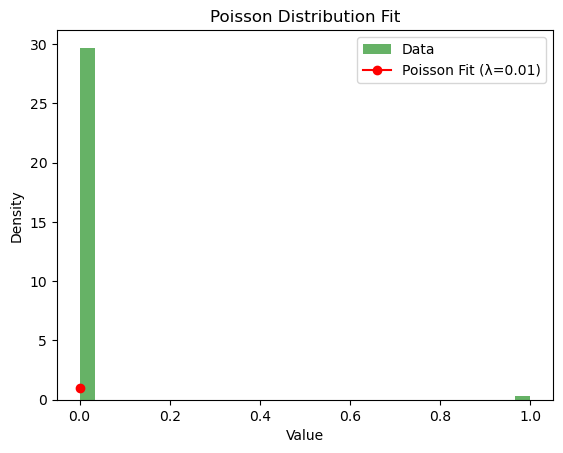

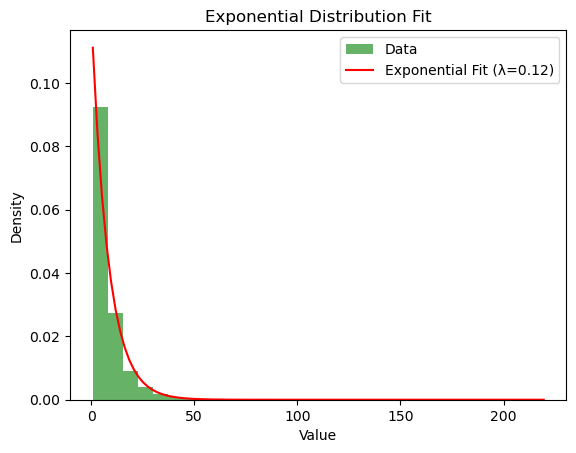

File: /Users/tinduong/Projects/neural_class/project2/BuszakiLab MizusekiK hc3/ec012/ec012ec.375.res.2
MLE Poisson λ: 0.00, Fano Factor: nan
MLE Exponential λ: 0.08, Sample Mean ISI: 11.93


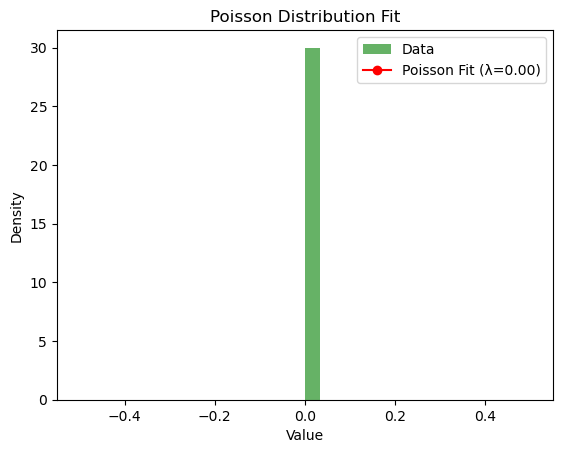

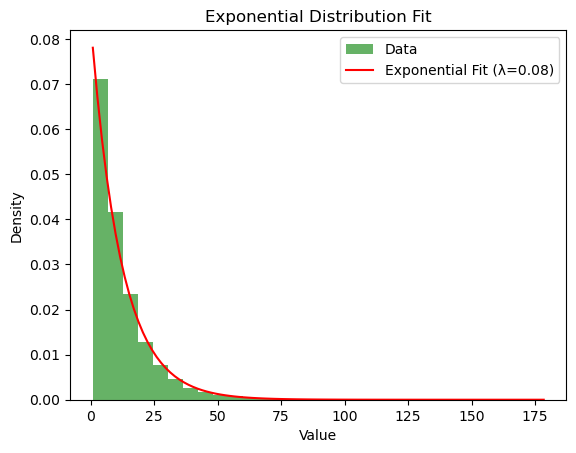

File: /Users/tinduong/Projects/neural_class/project2/BuszakiLab MizusekiK hc3/ec016/ec016.272.res.1
MLE Poisson λ: 0.00, Fano Factor: nan
MLE Exponential λ: 0.15, Sample Mean ISI: 6.61


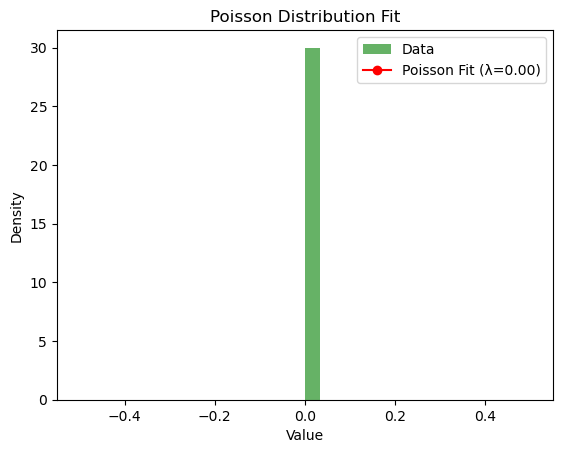

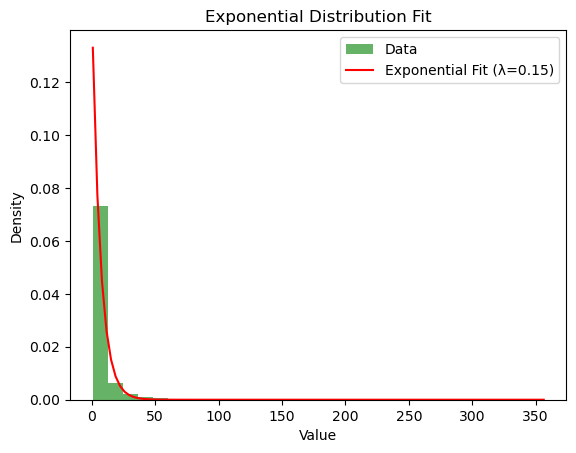

File: /Users/tinduong/Projects/neural_class/project2/BuszakiLab MizusekiK hc3/ec016/ec016.272.res.2
MLE Poisson λ: 0.00, Fano Factor: nan
MLE Exponential λ: 0.11, Sample Mean ISI: 8.90


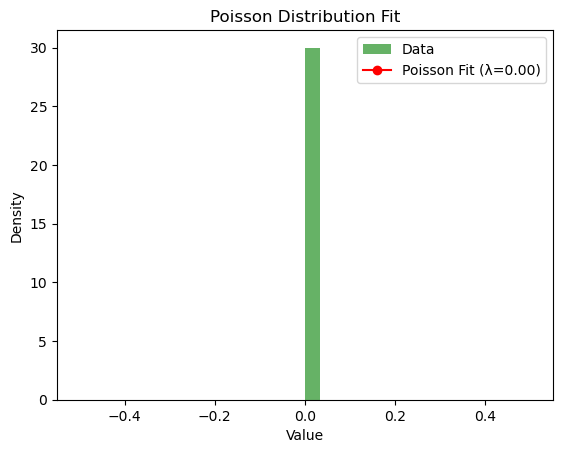

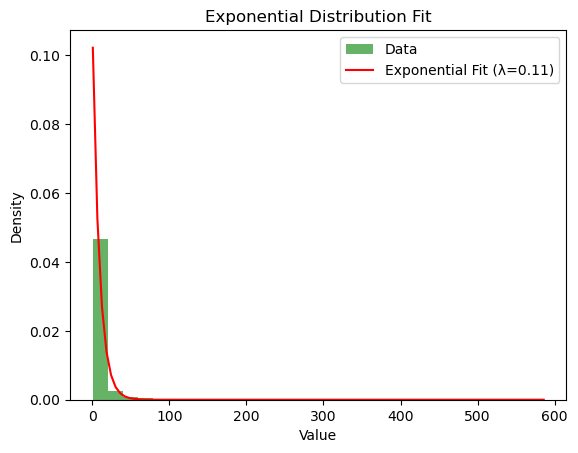

File: /Users/tinduong/Projects/neural_class/project2/BuszakiLab MizusekiK hc3/ec016/ec016.457.res.1
MLE Poisson λ: 0.01, Fano Factor: 0.99
MLE Exponential λ: 0.10, Sample Mean ISI: 9.82


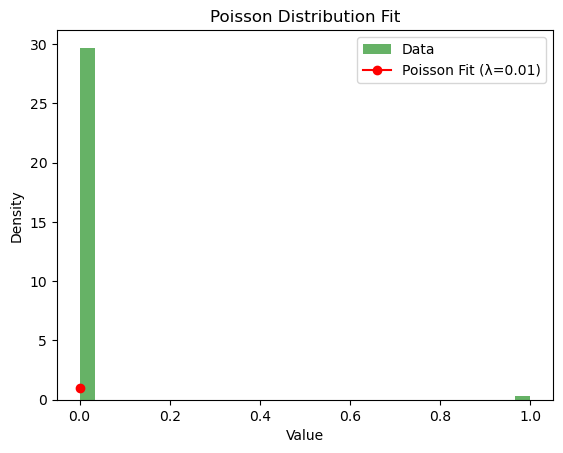

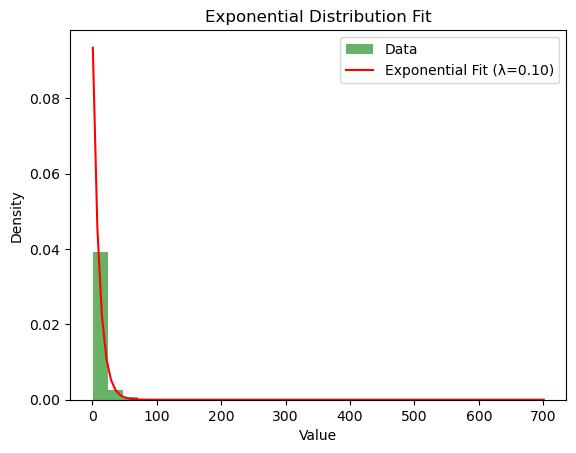

File: /Users/tinduong/Projects/neural_class/project2/BuszakiLab MizusekiK hc3/ec016/ec016.457.res.2
MLE Poisson λ: 0.02, Fano Factor: 0.98
MLE Exponential λ: 0.11, Sample Mean ISI: 9.22


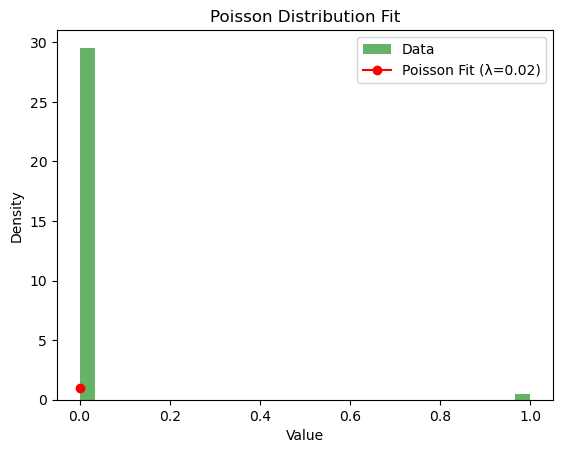

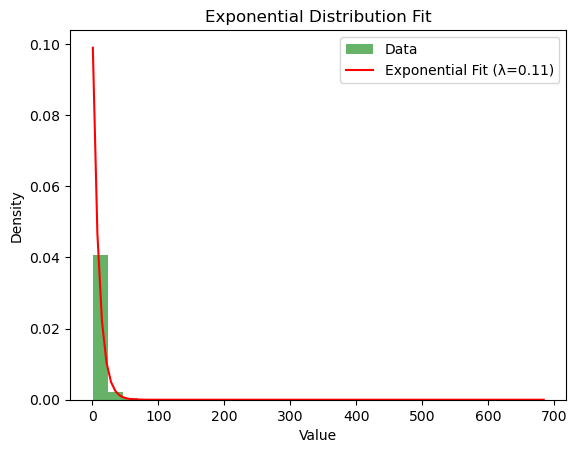

File: /Users/tinduong/Projects/neural_class/project2/BuszakiLab MizusekiK hc3/ec016/ec016.674.res.1
MLE Poisson λ: 0.00, Fano Factor: nan
MLE Exponential λ: 0.06, Sample Mean ISI: 17.70


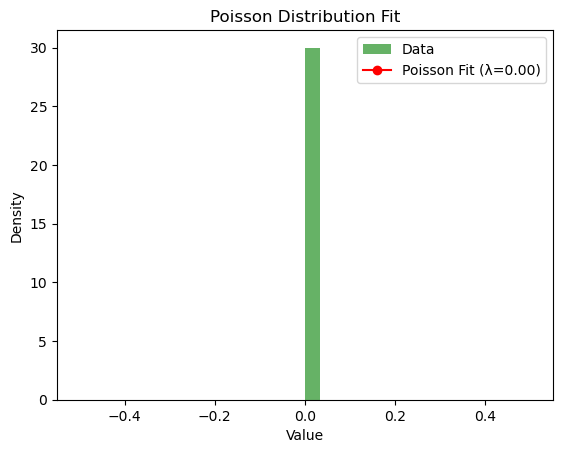

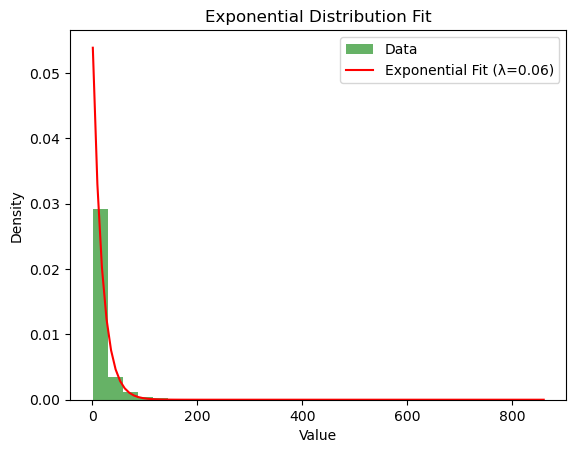

File: /Users/tinduong/Projects/neural_class/project2/BuszakiLab MizusekiK hc3/ec016/ec016.674.res.2
MLE Poisson λ: 0.00, Fano Factor: nan
MLE Exponential λ: 0.04, Sample Mean ISI: 24.26


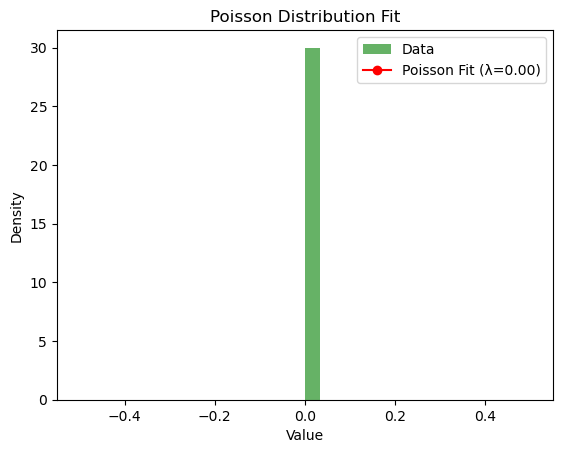

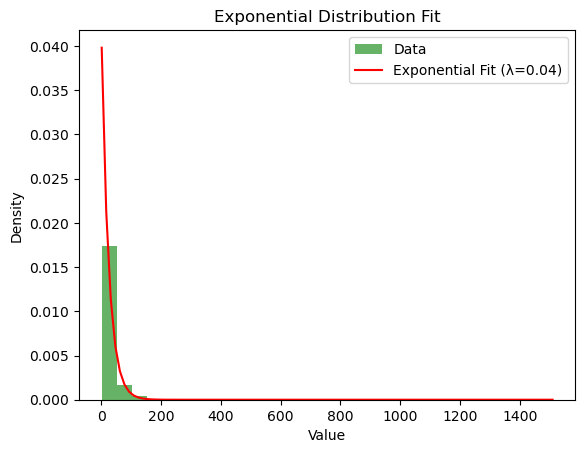

File: /Users/tinduong/Projects/neural_class/project2/BuszakiLab MizusekiK hc3/ec016/ec016.682.res.1
MLE Poisson λ: 0.00, Fano Factor: nan
MLE Exponential λ: 0.03, Sample Mean ISI: 35.56


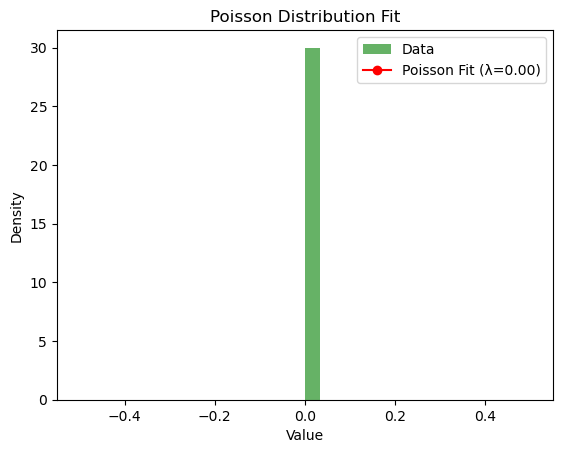

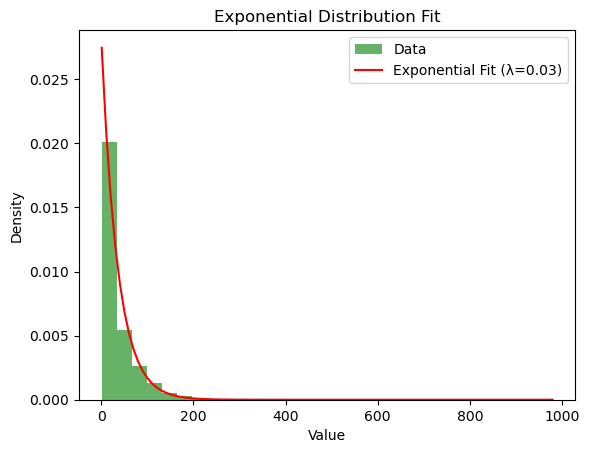

File: /Users/tinduong/Projects/neural_class/project2/BuszakiLab MizusekiK hc3/ec016/ec016.682.res.2
MLE Poisson λ: 0.00, Fano Factor: nan
MLE Exponential λ: 0.02, Sample Mean ISI: 42.70


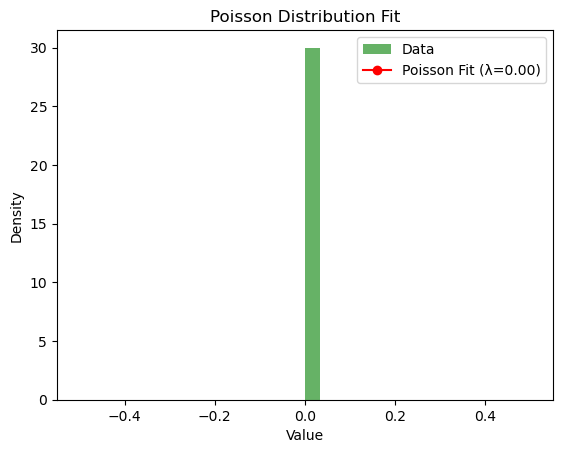

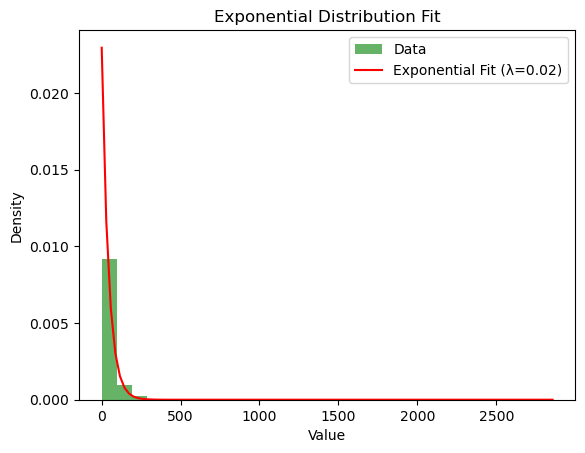

In [ ]:
def analyze_spike_data(file_path, bin_size=0.05, duration=10): #Analyzes spike data
    print(f"File: {file_path}")
    
    spike_times = load_data(file_path)
    spike_times = spike_times * 0.05   
    
    spike_counts = compute_spike_counts(spike_times, bin_size, duration)
    fano_factor = compute_fano_factor(spike_counts)
    
    lambda_poisson = np.mean(spike_counts)  # MLE for Poisson is the sample mean
    
    isis = compute_isi(spike_times) # Inter-spike intervals
    lambda_exponential = 1 / np.mean(isis) # MLE for Exponential is 1 / sample mean
    
    print(f"MLE Poisson λ: {lambda_poisson:.2f}, Fano Factor: {fano_factor:.2f}")
    print(f"MLE Exponential λ: {lambda_exponential:.2f}, Sample Mean ISI: {np.mean(isis):.2f}")
    
    plot_dist(spike_counts, "poisson", lambda_poisson)
    plot_dist(isis, "exponential", lambda_exponential)

sample_files = ["/Users/tinduong/Projects/neural_class/project2/BuszakiLab MizusekiK hc3/ec012/ec012ec.187.res.1", 
                "/Users/tinduong/Projects/neural_class/project2/BuszakiLab MizusekiK hc3/ec012/ec012ec.187.res.2", 
                "/Users/tinduong/Projects/neural_class/project2/BuszakiLab MizusekiK hc3/ec012/ec012ec.228.res.1", 
                "/Users/tinduong/Projects/neural_class/project2/BuszakiLab MizusekiK hc3/ec012/ec012ec.228.res.2",
                "/Users/tinduong/Projects/neural_class/project2/BuszakiLab MizusekiK hc3/ec012/ec012ec.375.res.1", 
                "/Users/tinduong/Projects/neural_class/project2/BuszakiLab MizusekiK hc3/ec012/ec012ec.375.res.2", 
                "/Users/tinduong/Projects/neural_class/project2/BuszakiLab MizusekiK hc3/ec016/ec016.272.res.1",
                "/Users/tinduong/Projects/neural_class/project2/BuszakiLab MizusekiK hc3/ec016/ec016.272.res.2",
                "/Users/tinduong/Projects/neural_class/project2/BuszakiLab MizusekiK hc3/ec016/ec016.457.res.1",
                "/Users/tinduong/Projects/neural_class/project2/BuszakiLab MizusekiK hc3/ec016/ec016.457.res.2",
                "/Users/tinduong/Projects/neural_class/project2/BuszakiLab MizusekiK hc3/ec016/ec016.674.res.1",
                "/Users/tinduong/Projects/neural_class/project2/BuszakiLab MizusekiK hc3/ec016/ec016.674.res.2",
                "/Users/tinduong/Projects/neural_class/project2/BuszakiLab MizusekiK hc3/ec016/ec016.682.res.1",
                "/Users/tinduong/Projects/neural_class/project2/BuszakiLab MizusekiK hc3/ec016/ec016.682.res.2"
                ]
for file in sample_files: #Analyze all sample files
    analyze_spike_data(file)
